# 

# ODE models

## Introduction

Recall that in a regression model we have some measurements, some
measurable quantities and some covariates. It’s convenient to split the
problem of estimating new measurements into a probabilistic part that
connects the measurement with the measurable, and a deterministic part
that connects the parameters and covariates with the expected value
$\hat{y}$ of the measurable (or some other statistic). In generalised
linear models the covariates connect with the measurable by a linear
relationship and a link function, e.g. $\hat{y} = l(x\beta)$ for some
link function $l$.

Today we look at Bayesian regression models where the deterministic part
involves an **initial value problem** whose dynamics are by a system of
**ordinary differential equations**, aka ODEs.

This kind of model comes up a lot in biology because we often have
detailed scientific knowledge about how a system changes, coupled with
measurements of it was at different times.

If there is an analytic solution to the equation system, we can just
include the solution in our statistical model, leading to a slightly
more involved deterministic component: easy, maybe we just have to write
a few lines rather than just `x@b`!

However, often we want to solve an initial value problem whose system of
equations has no analytic solution, but which we can solve approximately
using numerical methods.

This is tricky in the context of Hamiltonian Monte Carlo for two
reasons:

-   1.  Computation: HMC requires many evaluations of the log
        probability density function and its gradients. At every
        evaluation, the sampler needs to solve the embedded equation
        system and find the gradients of the solution with respect to
        all model parameters.
-   1.  Extra source of error: how good of an approximation is good
        enough?

However, we can still do it!

Reading:

-   Timonen et al. (2022)
-   Stan user guide sections: [algebraic equation
    systems](https://mc-stan.org/docs/stan-users-guide/algebraic-equations.html),
    [ODE systems](https://mc-stan.org/docs/stan-users-guide/odes.html),
    [DAE systems](https://mc-stan.org/docs/stan-users-guide/dae.html).

## Differential Equations

Are equations that relate functions to their derivatives. Some examples
of these functions are quantities such as

-   1.  The volume of the liquid in a bioreactor over time

$$
\frac{dV}{dt} = F_{in} - F_{out}.
$$

-   1.  The temperature of a steel rod with heat source at one end

$$
\frac{dT}{dt} = \alpha \frac{d^{2}T}{dx^{2}}.
$$

-   1.  The concentration of a substrate in a bioreactor over time
        (example below). As mentioned previously, the solution to many
        of these sorts of differential equations does not have an
        algebraic solution, such as $T(t) = f(x, t)$.

## Ordinary Differential Equations

Arguably the most simple type of differential equation is an ordinary
differential equation. An ordinary differential equaiton has only one
independent parameter, typically this will be either time or a
dimension.

> **Note**
>
> Other kinds of differential equations include [partial differential
> equations](https://en.wikipedia.org/wiki/Partial_differential_equation)
> and [stochastic differential
> equations](https://en.wikipedia.org/wiki/Stochastic_differential_equation) -
> we will only consider ODEs for the remainder of the course.

To gain some intuition about what is going on we will investigate a very
simple ODE system with just one state variable: the height of an
initially empty reactor over time with constant flow rates into and out
of the reactor.

<figure>
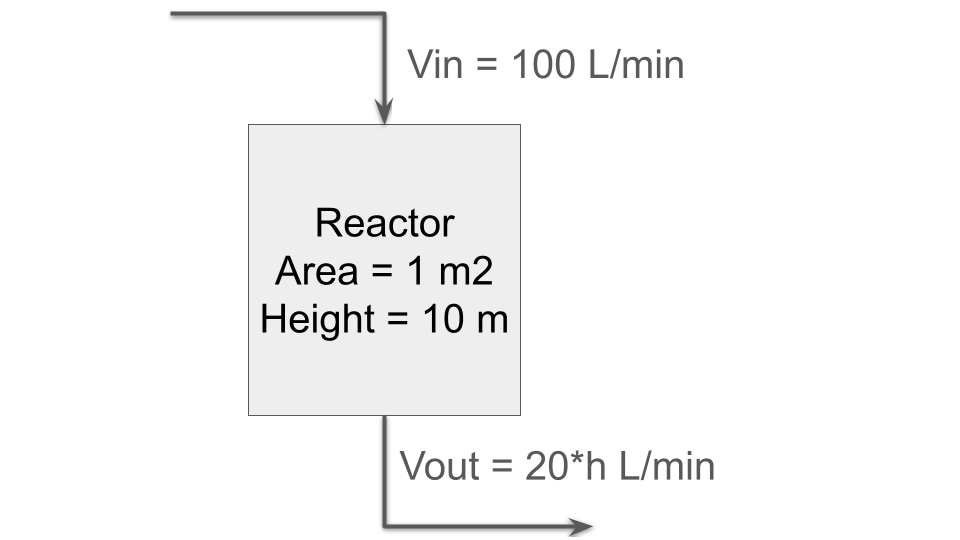
<figcaption aria-hidden="true">Reactor</figcaption>
</figure>

$$
\begin{align*}
\frac{dV}{dt} &= F_{in} - F_{out} \\
\frac{dh}{dt} &= \frac{F_{in} - F_{out}}{Area} \\
              &= \frac{0.1 - 0.02 * h}{1} (\frac{m^3}{min})
\end{align*}
$$

This ODE system can be manually integrated and has an analytic solution.
We shall investigate how the height changes over time and what the
steady state height is.

The first question is an example of an `initial-value problem`. Where we
know the initial height (h=0), and we can solve the integral

$$
dh = \int_{t=0}^{t} 0.1 - 0.02*h dt.
$$

By using integrating factors (Don’t worry about this) we can solve for
height

$$
h = \frac{0.1}{0.02} + Ce^{-0.02t}.
$$

Finally, we can solve for the height by substituting what we know: at
$t = 0$, $h = 0$. Therefore, we arrive at the final equation

$$
 h = \frac{0.1}{0.02}(1 - e^{-0.02t}).
$$

We can answer the question about what its final height would be by
solving for the `steady-state`

$$
\frac{dh}{dt} = 0.
$$

Where after rearranging we find the final height equal to 5m, within the
dimensions of the reactor

$$
h = \frac{0.1}{0.02} (m).
$$

## Example

We have some tubes containing a substrate $S$ and some biomass $C$ that
we think approximately follow the Monod equation for microbial growth:

$$
\begin{align*}
\frac{dX}{dt} &= \frac{\mu_{max}\cdot S(t)}{K_{S} + S(t)}\cdot X(t) \\
\frac{dS}{dt} &= -\gamma \cdot \frac{\mu_{max}\cdot S(t)}{K_{s} + S(t)} \cdot X(t)
\end{align*}
$$

We measured $X$ and $S$ at different time points in some experiments,
with results $y_X$ and $y_S$ and we want to try and find out
$\mu_{max}$, $K_{S}$ and $\gamma$ for the different strains in the
tubes.

You can read more about the Monod equation in Allen and Waclaw (2019).

### What we know

$\mu_{max}, K_S, \gamma, S, X$ are non-negative.

$S(0)$ and $X(0)$ vary a little by tube.

$\mu_{max}, K_S, \gamma$ vary by strain.

Measurement noise is roughly proportional to measured quantity.

### Statistical model

We use two regression models to describe the measurements:

To capture the variation in parameters by tube and strain we add a
hierarchical model:

To get a true abundance given some parameters we put an ode in the
model:

$$
\hat{X}(t), \hat{S}(t) = \text{solve-monod-equation}(t, X_0, S_0, \mu_{max}, \gamma, K_S)
$$

## References

Allen, Rosalind J, and Bartłomiej Waclaw. 2019. “Bacterial Growth: A
Statistical Physicist’s Guide.” *Reports on Progress in Physics.
Physical Society (Great Britain)* 82 (1): 016601.
<https://doi.org/10.1088/1361-6633/aae546>.

Timonen, Juho, Nikolas Siccha, Ben Bales, Harri Lähdesmäki, and Aki
Vehtari. 2022. “An Importance Sampling Approach for Reliable and
Efficient Inference in Bayesian Ordinary Differential Equation Models.”
arXiv. <https://doi.org/10.48550/arXiv.2205.09059>.